In [1]:
# ==============================
# Básicos
# ==============================
import os
import time
from datetime import datetime
import copy
from collections import OrderedDict
import random
from torch.optim.lr_scheduler import LinearLR, SequentialLR, CosineAnnealingLR
from tqdm.notebook import tqdm
from albumentations.pytorch import ToTensorV2
from PIL import Image


from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
import hashlib

# ==============================
# NumPy e Pandas
# ==============================
import numpy as np
import pandas as pd
from dataclasses import dataclass
import matplotlib.pyplot as plt 

# ==============================
# Scikit-learn
# ==============================
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

# ==============================
# PyTorch
# ==============================
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.optim import AdamW as AdamW
from torch.optim.lr_scheduler import CosineAnnealingLR
from torch.optim import Adam
from torch import amp
from torchvision import models
from torch.utils.data import Subset

# ==============================
# TensorFlow
# ==============================
import tensorflow as tf

# ==============================
# Utilitários
# ==============================
from tqdm.notebook import tqdm
import albumentations as A


import pandas as pd

# mostra o texto completo em cada coluna, sem cortar
pd.set_option('display.max_colwidth', None)

# aumenta o número de colunas visíveis
pd.set_option('display.max_columns', None)

# aumenta a largura total do display
pd.set_option('display.width', 2000)


import os
import pandas as pd

import os
import pandas as pd

def Folder2DataFrame(path):

    # pega só as pastas do primeiro nível (ex: ['train', 'valid'])
    folders = [
        item for item in os.listdir(path)
        if os.path.isdir(os.path.join(path, item))
    ]

    if len(folders) < 5:
        print(f"Pastas encontradas: {folders}")

    df = pd.DataFrame(columns=['file', 'deltaH_cm'])

    # percorre cada pasta de primeiro nível
    for fold in folders:
        fold_path = os.path.join(path, fold)

        # agora desce dentro dessa pasta e pega os arquivos
        for raiz, pastas, arquivos in os.walk(fold_path):

            # se tiver arquivos, eles são as imagens
            for arquivo in arquivos:
                caminho_imagem = os.path.join(raiz, arquivo)

                # pega o rótulo a partir do nome da pasta
                label = os.path.basename(raiz)

                df.loc[len(df)] = [caminho_imagem, float(label)]

    return df


2025-12-12 23:31:18.628066: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765582278.817688      47 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765582278.869151      47 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

In [2]:
!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="WrSsYZ8GgJHC2S5jFe0x")
project = rf.workspace("visiongauge").project("utm_dataset-ooorv")
version = project.version(16)
dataset = version.download("folder")
                

                

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 38.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 101.3 MB/s eta 0:00:0000:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
s3fs 2025.3.0 requires fsspec==2025.3.0.*, but you have fsspec 2025.10.0 which is incompatible.
ray 2.51.1 requires click!=8.3.0,>=7.0, but you have click 8.3.0 which is incompatible.
google-colab 1.0.0 requires notebook==6.5.7, but you have notebook 6.5.4 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, 

# Aplicar Crop/Translation Aug

In [3]:
DO_IT = False
dataset_name = "UTM_Dataset-16"

if DO_IT:
    my_current_dir = os.getcwd()
    
    
    # Função para aplicar zoom:
    def apply_zoom(img, zoom_factor):
        h, w, _ = img.shape
        new_h = int(h * zoom_factor)
        new_w = int(w * zoom_factor)
    
        img_resized = cv2.resize(img, (new_w, new_h))
    
        # Crop ou pad para voltar ao tamanho original
        if zoom_factor < 1.0:
            # Pad
            pad_h = (h - new_h) // 2
            pad_w = (w - new_w) // 2
            padded = np.zeros((h, w, 3), dtype=img.dtype)
            padded[pad_h:pad_h + new_h, pad_w:pad_w + new_w] = img_resized
            return padded
        
        else:
            # Crop
            start_row = (new_h - h) // 2
            start_col = (new_w - w) // 2
            return img_resized[start_row:start_row + h, start_col:start_col + w]
    
    # Função para cortar a image  e pular linhas
    def crop_skip_lines(img, skip=100, image_size=400):
        h, w, _ = img.shape
        cropped = img[skip:skip + image_size, :image_size, :]
        return cropped

    def crop_skip_lines(img, skip=100, image_size=400):
        h, w, _ = img.shape

        # altura disponível depois do skip
        usable_height = h - skip
    
        # tamanho do quadrado é o menor entre largura e altura disponível
        size = min(w, usable_height)
    
        # crop começa após o skip e pela esquerda
        start_y = skip
        start_x = 0
    
        cropped = img[start_y:start_y + size, start_x:start_x + size, :]
        return cropped
    
    
    target = 500 - 450 # -- 276
    skips = [i for i in range(0, target, 5)]
    print(f"O número de skips rows é: {len(skips)}")
    
    zooms = [0.9, 1.2, 1.4, 1.6]
    print(f"O número de zooms é: {len(zooms)}")
    
    sets = ["train", "valid", "test"]
    
    import random
    import os
    import cv2
    import tqdm
    
    resizes = [(size, size) for size in range(110, 251, 10)]
    print(f"O número de crops é: {len(resizes)}")
    
    #============================================================================================================
    # APLICAR OS CROPS DIFERENTES
    for set_name in sets:
        print(f"[RESIZE] Processando {set_name}")
    
        base_dir = os.path.join(my_current_dir, dataset_name, set_name)
    
        for folder in tqdm.tqdm(os.listdir(base_dir)):
            current_folder = os.path.join(base_dir, folder)
    
            for image in os.listdir(current_folder):
                if image.startswith("image"):
                    image_path = os.path.join(current_folder, image)
                    
                    img = cv2.imread(image_path)
                    if img is None:
                        print(f"Erro ao ler: {image_path}")
                        continue
                    
                    # extrair número da imagem
                    image_number = image.split("_")[2]
                    resized_img = cv2.resize(img, (95, 95))
                    resized_img = cv2.resize(img, (120, 120))
    
                        # salvar
                    image_name = f"resize_{95}to{120}_image_{image_number}"
                    save_path = os.path.join(current_folder, f"{image_name}.jpg")
    
                    cv2.imwrite(save_path, resized_img)
    
    
    
    #============================================================================================================
    # Aplicar zooms + SKIP ROWS
    for set in sets:
        print(f"[ZOOM + SKIP] Processando {set}")
        
        for folder in tqdm.tqdm(os.listdir(os.path.join(my_current_dir, dataset_name, set))):
            current_folder = os.path.join(my_current_dir,dataset_name, set, folder)
        
            for image in os.listdir(current_folder):
                if image.split("_")[0].startswith("image"):
                    image_path = os.path.join(current_folder, image)
                    image_reader = cv2.imread(image_path)
                    image_number = image.split("_")[2]
        
                    for zoom in zooms:
                        img_zoomed = apply_zoom(image_reader, zoom)
        
                        # resize
                        img_zoomed = cv2.resize(img_zoomed, (224, 224))
        
                        # salvar a imagem
                        zoom_str = str(zoom).replace(".", "_")
                        image_name = "zoom_" + zoom_str + "image" + image_number
                        save_path = os.path.join(my_current_dir, dataset_name, set, folder, f"{image_name}.jpg")
        
                        # salvar imagem
                        cv2.imwrite(save_path, img_zoomed)
    
        
        #============================================================================================================
        # Aplicar Skip Rows 
        for folder in tqdm.tqdm(os.listdir(os.path.join(my_current_dir, dataset_name, set))):
            current_folder = os.path.join(my_current_dir, dataset_name, set, folder)
        
            for image in os.listdir(current_folder):
                if image.split("_")[0].startswith("image"):
                    image_path = os.path.join(current_folder, image)
                    image_reader = cv2.imread(image_path)
                    image_number = image.split("_")[2]
        
                    # Aplicar cortes pulando linhas
                    for skip in skips:
                        img_cropped = crop_skip_lines(image_reader, skip=skip)
        
                        # resize
                        img_cropped = cv2.resize(img_cropped, (224, 224))
        
                        # salvar a imagem
                        skip_str = str(skip)
                        image_name = "skip_" + skip_str + "_image" + image_number
                        save_path = os.path.join(my_current_dir, dataset_name, set, folder, f"{image_name}.jpg")
        
                        # salvar imagem
                        cv2.imwrite(save_path, img_cropped)
                    
    print("Finalizado o aumento de dados com zoom.")    

# Settings

In [4]:
from dataclasses import dataclass
import pandas as pd
from sklearn.preprocessing import StandardScaler

# ================= CONFIG =================

class SETTINGS:
    def __init__(self):
        self.USE_SCALER = False
        
        self.DATASET_NAME = "7.5k" # [3k, 6k, 7.5k]

        self.TRAIN_DATASET_DIR = f"/kaggle/working/{dataset_name}//train"
        self.VALID_DATASET_DIR = f"/kaggle/working/{dataset_name}//valid"
        self.TEST_DATASET_DIR = f"/kaggle/working/{dataset_name}//test"
        
        self.TRAIN_DATASET = Folder2DataFrame(self.TRAIN_DATASET_DIR)
        self.VALID_DATASET = Folder2DataFrame(self.VALID_DATASET_DIR)
        self.TEST_DATASET = Folder2DataFrame(self.TEST_DATASET_DIR)

        # Dataset para splitar para caso for utilizar sklearn split
        self.DATASET = pd.concat([self.TRAIN_DATASET, self.VALID_DATASET], ignore_index=True)
        print(self.DATASET.index.min(), self.DATASET.index.max()) 
        
        # SCALER CONFIG
        self.SCALER = StandardScaler()
        self.SCALER.fit(self.TRAIN_DATASET["deltaH_cm"].values.reshape(-1, 1))
        
        if self.USE_SCALER:
            self.TRAIN_DATASET["DELTA_SCALED"] = self.SCALER.transform(self.TRAIN_DATASET["deltaH_cm"].values.reshape(-1, 1))
            self.VALID_DATASET["DELTA_SCALED"] = self.SCALER.transform(self.VALID_DATASET["deltaH_cm"].values.reshape(-1, 1))

        VERBOSE = False
        
        # TRAINING
        self.TRAINING = True
        self.BATCH_SIZE = 64
        self.K_FOLD = 1
        self.NUM_EPOCHS = 30
        self.LR = 1e-5
        self.MAX_CACHE = 100
        self.PATIENCE = 10

    
SETTINGS = SETTINGS()

0 155007


In [5]:
print(SETTINGS.TRAIN_DATASET.shape)
print(SETTINGS.VALID_DATASET.shape)
print(SETTINGS.TEST_DATASET.shape)

(121664, 2)
(33344, 2)
(17248, 2)


# Arch

In [6]:
from datetime import datetime
from torchvision import models

class NewDirectModel(nn.Module):
    def __init__(self, backbone_name: str, image_size:tuple=(120, 120), unfreeze_all:bool=False, use_head:bool = False, debug: bool = False):
        super().__init__()
        self.model_name = backbone_name
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.debug = debug
        self.use_head = use_head

        self.unfreeze_all = unfreeze_all # descongelar tudo e manter o shape da arquitetura

        # placeholder image_size; será definido em load_backbone
        self.image_size = image_size

        # Carrega o backbone e constrói a head
        self.load_backbone()

        self.to(self.device)

    def build_head(self, output_features):
        self.head = nn.Sequential(
                    nn.Linear(output_features, 256),
                    nn.ReLU(inplace=True),
                    nn.Dropout(0.2),
                    nn.Linear(256, 256 // 2),
                    nn.ReLU(inplace=True),
                    nn.Dropout(0.2),
                    nn.Linear(256 // 2, 1),
                )

        for p in self.head.parameters():
                p.requires_grad = True

        print("Descongelado os parâmetros de head")

        parameters = sum(p.numel() for p in self.head.parameters() if p.requires_grad)
        print(f"Head MLP Parâmetros Treináveis: {parameters}")
    

    def forward(self, x):
        x = x.to(self.device)

        # Forward: Backbone -> Head -> Output
        if self.use_head:
            features = self.backbone(x)
            return self.head(features)

           
        # Forward: Backbone -> Output
        else:
            return self.backbone(x)
        

    def load_model(self, path_or_ckpt):
        # carregar checkpoint
        if isinstance(path_or_ckpt, str):
            ckpt = torch.load(path_or_ckpt, map_location=self.device)
            
        elif isinstance(path_or_ckpt, dict):
            ckpt = path_or_ckpt
            
        else:
            raise ValueError("path_or_ckpt deve ser str (path) ou dict (checkpoint)")

        # manter checkpoint completo
        self.checkpoint = ckpt

        # metadata e flags
        meta = ckpt.get("metadata", {})
        self.model_name = meta.get("backbone_name", self.model_name)

        # reconstruir arquitetura igual ao treino
        self.load_backbone()

        # carregar pesos do model_state (compatibilidade permissiva)
        model_state = ckpt.get("model_state", None)
        if model_state is not None:
            self.load_state_dict(model_state, strict=False)

        self.to(self.device)
        #self.eval()

        if self.debug:
            print(f"Modelo restaurado. Backbone: {self.model_name} - head: {'sim' if hasattr(self,'head') and self.head is not None else 'não'}")
        
        return self
        

    def load_backbone(self):
        name = self.model_name.lower()

        def print_trainable_layers(model):
            print("Parâmetros treináveis:")
            for n, p in model.named_parameters():
                if p.requires_grad:
                    print(f"{n} -> {p.shape}")
            print("--------------------------------------------------")


        # self.gradient_set(classifier_layer = m.fc, model=m, out_feats = out_feats)

        # VIT =======================================================================================================================================
        if name in ("vit", "vit_b16", "vit_b_16"):
            m = models.vit_b_16(weights=models.ViT_B_16_Weights.DEFAULT)

            # tamanho padrão do ViT
            self.image_size = (224, 224)
            
            # hidden_dim = tamanho do embedding
            out_feats = m.hidden_dim
    
            # se usar head MLP → só extrai features
            if self.use_head:
                m.heads = nn.Identity()
                self.build_head(output_features=out_feats)
            else:
                # regressão direta
                m.heads = nn.Linear(out_feats, 1)
    
            # congelar tudo inicialmente
            for p in m.parameters():
                p.requires_grad = False
    
            # unfreeze total → fine-tuning completo
            if self.unfreeze_all:
                for p in m.parameters():
                    p.requires_grad = True
                if self.debug:
                    print("[ViT] Descongelado COMPLETO.")
    
            # unfreeze parcial → melhor prática
            else:
                 # últimas 2 camadas do encoder
                for p in m.encoder.layers[-2:].parameters(): 
                    p.requires_grad = True
    
                # heads sempre treinável (Linear ou Identity->Head)
                for p in m.heads.parameters():
                    p.requires_grad = True
    
                if self.debug:
                    print("[ViT] Encoder descongelado. Patch Embedding congelado.")

            self.backbone = m


        # RESNET =======================================================================================================================================
        elif name in ("resnet", "resnet18"):
            self.image_size = (120, 120)
            m = models.resnet18(pretrained=True)
        
            out_feats = m.fc.in_features
        
            # Usar head como MLP para regressão
            if self.use_head:
                m.fc = nn.Identity() # remover a última FC
                self.build_head(output_features=out_feats) # criar head mlp
                
            # Sem head: usa FC de saída única -> (1280, 1)
            else:
                m.fc = nn.Linear(out_feats, 1)
        
            # Congelar tudo
            for p in m.parameters():
                p.requires_grad = False
        
            # Descongelar tudo se  unfreeze_all == True
            if self.unfreeze_all:
                for p in m.parameters():
                    p.requires_grad = True
        
            # Descongelar apenas o classificador (FC)
            else:
                for param in m.layer3.parameters():
                  param.requires_grad = True

                print("Resnet Features [3] Descongelado")

                for param in m.layer4.parameters():
                  param.requires_grad = True
                    
                print("Resnet Features [4] Descongelado")

                for p in m.fc.parameters():
                    p.requires_grad = True

            self.backbone = m
    

        # EfficientNet =======================================================================================================================================
        elif name in ("efficientnet_lite", "efficientnet_b0"):
            self.image_size = (120, 120)
            m = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.DEFAULT)
        
            # nº de features que saem antes da FC final (classificador)
            out_feats = m.classifier[1].in_features
        
            # Usar head como MLP para regressão
            if self.use_head:
                # Queremos usar a head MLP: remover a FC final e ficar só com features
                m.classifier[1] = nn.Identity() 
                
                # Cria a MLP de regressão
                self.build_head(output_features=out_feats)
        
            else:
                # Não vamos usar head: ajusta a FC para saída de 1
                m.classifier[1] = nn.Linear(out_feats, 1)
        
            # Congelar todos os parâmetros
            for p in m.parameters():
                p.requires_grad = False

            # Descongelar toda a arquitetura se unfreeze_all == True
            if self.unfreeze_all:
                print("[EfficientNet] backbone descongelado (todos os params treináveis)")
                for p in m.parameters():
                    p.requires_grad = True
                    
            # Descongelar apenas o classificador (FC)
            else:
                # descongelar camada 6, 7 e 8
                for idx in [6, 7, 8]:
                    for param in m.features[idx].parameters():
                        param.requires_grad = True
                    print(f"[EfficientNet] Features [{idx}] Descongelado")


                # descongelar o classificador
                for p in m.classifier[1].parameters():
                    p.requires_grad = True           # deixa a FC treinável
                print("[EfficientNet] classificador (fc) descongelado")

            self.backbone = m

        else:
            raise ValueError(f"Backbone '{self.model_name}' inválido.")

    def parameter_groups(self, lr_backbone: float = 1e-5, lr_head: float = 1e-3):
        backbone_params = []
        head_params = []
    
        # --- Caso 1: use_head = True ---
        if self.use_head:
            # Tudo que é treinável do backbone -> lr_backbone
            for p in self.backbone.parameters():
                if p.requires_grad:
                    backbone_params.append(p)
    
            # Head MLP -> lr_head
            if hasattr(self, "head"):
                for p in self.head.parameters():
                    if p.requires_grad:
                        head_params.append(p)
    
        # --- Caso 2: use_head = False ---
        else:
            for name, p in self.backbone.named_parameters():
                if not p.requires_grad:
                    continue
    
                # última camada do backbone vai pro head
                if (
                    name.startswith("fc.") or
                    name.startswith("classifier.1.") or
                    name.startswith("heads.")
                ):
                    head_params.append(p)
                else:
                    backbone_params.append(p)
    
        groups = []
        if backbone_params:
            groups.append({"params": backbone_params, "lr": lr_backbone})
        if head_params:
            groups.append({"params": head_params, "lr": lr_head})
    
        print("Backbone params:", len(backbone_params))
        print("Head params:", len(head_params))
    
        return groups





In [7]:
print("================")
m = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.DEFAULT)
print(m.classifier)
print(f" o número de features é: {m.classifier[1].in_features}")

print("================")
m = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.DEFAULT)
m.classifier[1] = nn.Identity()
print(m.classifier[1])

print()
print(m.classifier)

print("================")
m = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.DEFAULT)
m.classifier[1] = nn.Linear(1200, 1)
print(m.classifier)


Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 183MB/s]


Sequential(
  (0): Dropout(p=0.2, inplace=True)
  (1): Linear(in_features=1280, out_features=1000, bias=True)
)
 o número de features é: 1280
Identity()

Sequential(
  (0): Dropout(p=0.2, inplace=True)
  (1): Identity()
)
Sequential(
  (0): Dropout(p=0.2, inplace=True)
  (1): Linear(in_features=1200, out_features=1, bias=True)
)


# Dataset

In [8]:
def hash_to_percent(x):
    h = hashlib.md5(str(x).encode()).hexdigest()
    return int(h, 16) % 100


class CustomDataset(Dataset):
    def __init__(self, data, image_size:tuple=(120,120), DATASET_PATH=SETTINGS.TRAIN_DATASET_DIR,
                 cache_size=50, use_transform=True, use_scaler=True, SPLIT_OPTION:str='SKLEARN', is_valid:bool=True):

        self.data = data.reset_index(drop=True)
        self.image_size = image_size 
        
        self.DATASET_PATH = DATASET_PATH
        self.cache_size = cache_size
        self._cache = OrderedDict()

        self.USE_TRANSFORM = use_transform
        self.USE_SCALER = use_scaler

        self.SPLIT_OPTION = SPLIT_OPTION


        height, width = image_size if isinstance(image_size, tuple) else (image_size, image_size)


        if isinstance(image_size, (tuple, list)):
            self.height, self.width = image_size
            
        else:
            self.height = self.width = image_size


        # usar hash
        if self.SPLIT_OPTION.upper() == 'HASHSPLIT':
            self.__hashSplit__()

        # usar sklearn split
        elif self.SPLIT_OPTION.upper() == 'SKLEARNSPLIT':
            self.__kFoldSplit__()
    

        # Albumentations COMPOSE (criado uma vez)
        if is_valid:
            # TRANSFORMAÇÕES DE VALIDAÇÃO (SEM AUGMENTAÇÃO)
            self.transform = A.Compose([
                A.Resize(self.height, self.width),
                A.Normalize(mean=[0.485, 0.456, 0.406],
                            std=[0.229, 0.224, 0.225]),
                ToTensorV2(),
            ])
        else:
            # TRANSFORMAÇÕES DE TREINO (COM AUGMENTAÇÃO)
            self.transform = A.Compose([
                A.RandomBrightnessContrast(0.1,0.2,p=0.5),
                A.RGBShift(5,5,5,p=0.3),
                
                A.ISONoise(color_shift=(0.005, 0.01), intensity=(0.05, 0.1), p=0.7),

                #A.OneOf([A.ShiftScaleRotate(rotate_limit=15, shift_limit=0.03, scale_limit=0.05, p=1),
                         #A.Perspective(scale=(0.01, 0.03), p=1)], p=0.4),
                

                A.Defocus(radius=(1, 2), alias_blur=(0.05, 0.2), p=0.1),
                A.PlanckianJitter(mode="blackbody",temperature_limit=(4500, 7500),sampling_method="uniform"),

                # Aplicar Resize e Normalize Padrão
                A.Resize(self.height, self.width),
                A.Normalize(mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225]),
                ToTensorV2(),
            ])
            

    def __hashSplit__(self, val_percent=30):
        train_idx = []
        val_idx = []
    
        for i, row in self.data.iterrows():
            file_id = row["file"]
            p = hash_to_percent(file_id)
    
            if p < val_percent:
                val_idx.append(i)
            else:
                train_idx.append(i)
    
        self.TRAIN = self.data.iloc[train_idx].reset_index(drop=True)
        self.VALID = self.data.iloc[val_idx].reset_index(drop=True)


    def __kFoldSplit__(self):
        # Divide os dados em treino e validação com 80/20
        train_data, val_data = train_test_split(self.data, test_size=0.4, random_state=42)

        # Resetando o índice após o split
        self.TRAIN = train_data.reset_index(drop=True)  # Resetando o índice do dataset de treino
        self.VALID = val_data.reset_index(drop=True)    # Resetando o índice do dataset de validação


    def __len__(self):
        return len(self.data)

    def __apply_transform__(self, img):
        return self.transform(image=img)["image"]

    def __get_image__(self, idx):
        img_path = os.path.join(self.DATASET_PATH, self.data.iloc[idx]["file"])
        return np.array(Image.open(img_path).convert("RGB"))

    def __getitem__(self, idx):

        if idx in self._cache:
            self._cache.move_to_end(idx)
            img, y = self._cache[idx]
            return img.clone(), y.clone()

        img = self.__get_image__(idx)

        if self.USE_TRANSFORM:
            img = self.__apply_transform__(img)

        # Target
        if self.USE_SCALER and "DELTA_SCALED" in self.data.columns:
            y = torch.tensor(self.data.iloc[idx]["DELTA_SCALED"], dtype=torch.float32)
        else:
            y = torch.tensor(self.data.iloc[idx]["deltaH_cm"], dtype=torch.float32)

        self._cache[idx] = (img, y)
        self._cache.move_to_end(idx)
        if len(self._cache) > self.cache_size:
            self._cache.popitem(last=False)

        return img.clone(), y.clone()


    def _sample_(self):
        # escolhe índice aleatório
        idx = random.randrange(len(self.data))
    
        # carrega imagem
        img = self.__get_image__(idx)
    
        # aplica transform se existir
        if self.USE_TRANSFORM:
            img = self.__apply_transform__(img)
    
        # se for tensor: converte para numpy para plotar
        if isinstance(img, torch.Tensor):
            img = img.cpu().numpy()
            img = np.transpose(img, (1, 2, 0))  # C,H,W -> H,W,C
    
            # desfaz Normalize (imagem volta ao range real)
            mean = np.array([0.485, 0.456, 0.406])
            std  = np.array([0.229, 0.224, 0.225])
            img = (img * std + mean).clip(0, 1)
    
        # plota
        plt.figure(figsize=(5, 5))
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Sample idx: {idx}")
        plt.show()


# Image Training Sample

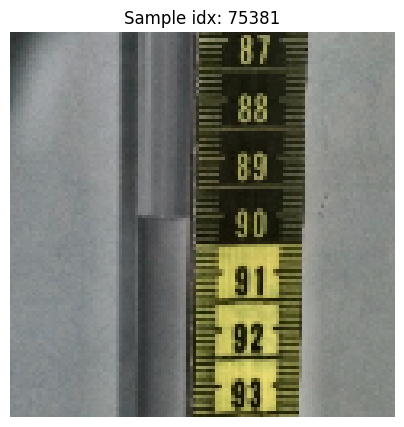

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import random
import torch
import cv2

dataset = CustomDataset(
    data=SETTINGS.DATASET, image_size=(120, 120), 
    DATASET_PATH=SETTINGS.TRAIN_DATASET_DIR, use_transform=True, is_valid=False)

dataset._sample_()

# Engine

In [10]:

class Engine():
    def __init__(self, debug: bool = False):
        super().__init__()

        self.retraining = None

        self.best_metric_value = float("inf")  # Inicializa o valor da melhor métrica (loss) como infinidade

        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.debug = debug

        if SETTINGS.USE_SCALER:
            self.scaler = SETTINGS.SCALER
            self.scaler_y_mean = self.scaler.mean_.tolist()
            self.scaler_y_scale = self.scaler.scale_.tolist()
        else:
            self.scaler_y_mean = 0
            self.scaler_y_scale = 1
            
        self.model_loaded = False
        self.cache_size = 100
        self.image_size = (120, 120)
        
        # Checkpoints + History
        self.history_replaced = False
        self.default_history = {
                    "epoch": [],
                    "train_loss": [],
                    "val_loss": [],
                    "test_loss": [],   
                    "lr_backbone": [],       
                    "lr_head": [],      
                    "time_per_epoch": [],
                    "run_range": []
                }


        self.primary_history = self.temp_history = copy.deepcopy(self.default_history)
        self.checkpoint = {"history": self.default_history}

        # Controle Range e Epoch
        self.range_initial = 0
        self.start_epoch = 0

    # ========================================
    # Optimizer builder
    # ========================================
    def build_optimizer(self, from_scratch: bool = True):
        # --- Monta trainable params ---
        if hasattr(self.model, "parameter_groups"):
            # Sempre use parameter_groups do modelo (mesmo quando from_scratch=True)
            # parameter_groups deve retornar lista de dicts no formato [{"params": [...], "lr": lr_backbone}, {"params":[...],"lr": lr_head}]
            self.trainable_params = self.model.parameter_groups(lr_backbone=self.lr_backbone, lr_head=self.lr_head)
        else:
            # fallback: lista simples de parâmetros treináveis
            self.trainable_params = [p for p in self.model.parameters() if p.requires_grad]
    
        if len(self.trainable_params) == 0:
            raise RuntimeError("Nenhum parâmetro marcado como treinável.")
    
        # --- Cria o optimizer mantendo a sua lógica original ---
        if self.optimizer_name == "adamw":
            if isinstance(self.trainable_params[0], dict):
                # Já tem os LRs definidos nos grupos
                self.optimizer = AdamW(self.trainable_params, weight_decay=self.weight_decay)
            else:
                # lista simples -> usa learning_rate geral
                self.optimizer = AdamW(self.trainable_params, lr=self.learning_rate, weight_decay=self.weight_decay)
    
        elif self.optimizer_name == "sgdw":
            if isinstance(self.trainable_params[0], dict):
                self.optimizer = SGDW(self.trainable_params, momentum=0.9, weight_decay=self.weight_decay)
            else:
                self.optimizer = SGDW(self.trainable_params, lr=self.learning_rate, momentum=0.9, weight_decay=self.weight_decay)
    
        else:
            raise ValueError(f"Optimizer '{self.optimizer_name}' não suportado.")
    
        # Carrega estado do checkpoint se necessário (somente quando retomando)
        if not from_scratch and hasattr(self, "ckpt"):
            self.optimizer.load_state_dict(self.ckpt["optimizer_state"])
            print("Optimizer carregado com os valores salvos no checkpoint.")
    
        # Debug: printar LRs de cada grupo
        if self.debug:
            for i, g in enumerate(self.optimizer.param_groups):
                lr_print = g.get("lr", None)
                print(f"Grupo {i}: lr = {lr_print}, parâmetros = {len(g['params'])}")



    # ========================================
    # Scheduler
    # ========================================
    def build_scheduler(self, from_scratch: bool = True):
        if self.use_schedule:
            if self.schedule_name == "cosineannealinglr":
                self.scheduler = CosineAnnealingLR(self.optimizer, T_max=self.epochs, eta_min=1e-6)
            
            elif self.schedule_name == "cosineannelingwarm":
                warmup_percentage = self.kwargs.get('warmup_percentage', 0.1)
                warmup_epochs = max(2, int(warmup_percentage * self.epochs))

                warmup = LinearLR(self.optimizer, start_factor=0.01, total_iters=warmup_epochs)
                cosine = CosineAnnealingLR(self.optimizer, T_max=self.epochs - warmup_epochs, eta_min=1e-8)

                self.scheduler = SequentialLR(self.optimizer, schedulers=[warmup, cosine], milestones=[warmup_epochs])

            if not from_scratch:
                self.scheduler.load_state_dict(self.ckpt["scheduler_state"])
                print("Scheduler carregado com os valores salvos no checkpoint.")
        else:
            self.scheduler = None

    # ========================================
    # Load Model
    # ========================================
    def load_model(self, custom_model_pth=None, custom: bool = False):
        if custom:
            self.retraining = True
            
            if custom_model_pth is None:
                raise ValueError("custom_model é None mas custom==True")

            self.ckpt = torch.load(custom_model_pth, map_location=self.device)

            metadata = self.ckpt.get("metadata", {})

            if self.unfreeze_all:
                self.unfreeze_all = metadata.get("unfreeze_all", False)
                
            self.use_head  = metadata.get("use_head", False)
            self.backbone_name = metadata.get("backbone_name", self.backbone_name)

            # Carregar o tamanho de imagem treinado
            self.image_size = metadata.get("training_image_size", (120,120))

            # Carrega a melhor loss do modelo
            self.best_metric_value = self.ckpt.get("best_val_loss", float("inf")) 
            print(f"A melhor loss carrega foi: {self.best_metric_value:.4f} e alterada para {self.best_metric_value*2.5}")
            self.best_metric_value = 2.5*self.best_metric_value
            
            self.model = NewDirectModel(backbone_name=self.backbone_name, unfreeze_all=self.unfreeze_all, use_head=self.use_head, image_size=self.image_size).to(self.device)

            # Carregar os pesos treinados
            self.model.load_state_dict(self.ckpt["model_state"], strict=False)

            # Restaurar scheduler/optimizer names
            self.optimizer_name = metadata.get("optimizer_name", "AdamW")
            self.schedule_name  = metadata.get("schedule_name", None)

            if self.use_last_lr:
                self.learning_rate = self.ckpt.get('last_lr', self.learning_rate)
                self.build_optimizer(from_scratch=False)
                self.build_scheduler(from_scratch=False)
                
            else:
                self.build_optimizer(from_scratch=True)
                self.build_scheduler(from_scratch=True)

            self.primary_history = self.ckpt.get("history", self.default_history)
            self.start_epoch = len(self.primary_history.get("epoch", []))
            self.range_initial = len(self.primary_history.get('val_loss', []))
            
        else:
            self.model = NewDirectModel(backbone_name=self.backbone_name, unfreeze_all=self.unfreeze_all,use_head=self.use_head, image_size=self.image_size).to(self.device)

            self.image_size = self.model.image_size
            self.model_loaded = True

            self.build_optimizer(from_scratch=True)
            self.build_scheduler(from_scratch=True)

        # Contagem dos parâmetros
        if isinstance(self.trainable_params[0], dict):  # Veio de parameter_groups
            n_trainable = sum(p.numel() for g in self.trainable_params for p in g["params"])
        else:
            n_trainable = sum(p.numel() for p in self.trainable_params)

        n_total = sum(p.numel() for p in self.model.parameters())
        print(f"Parâmetros treináveis: {n_trainable} / {n_total}")

    # ========================================
    # Set parameters
    # ========================================
    def set_parameters(self, batch_size: int, epochs: int, patience: int, 
                       use_transform: bool = True, backbone_name: str = "resnet", learning_rate = 0.001,weight_decay: float = 1e-4, 
                       use_schedule: bool = True, unfreeze_all: bool = False, optimizer: str = 'AdamW', 
                       schedule: str = "CosineAnnelingWarm", use_head: bool = False, SPLIT_OPTION: str = 'SKLEARN', image_size:tuple=(120,120), **kwargs):
        
        self.weight_decay = weight_decay
        
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.patience = patience
        self.USE_TRANSFORM = use_transform
        self.backbone_name = backbone_name
        self.use_schedule = use_schedule
        self.unfreeze_all = unfreeze_all
        self.optimizer_name = optimizer.lower()
        self.schedule_name = schedule.lower()
        self.use_head = use_head
        self.SPLIT_OPTION = SPLIT_OPTION
        self.image_size = image_size

        self.kwargs = kwargs

        self.lr_head = self.kwargs.get("lr_head", self.learning_rate)
        self.lr_backbone = self.kwargs.get("lr_backbone", self.learning_rate)



    # ========================================
    # Run Epoch
    # ========================================
    def run(self, output_dir, custom_model=None, show_all_epochs: bool = True, use_last_lr: bool = True):
        self.use_last_lr = use_last_lr
        self.show_all_epochs = show_all_epochs
        self.output_dir = output_dir
        os.makedirs(output_dir, exist_ok=True)
        self.history_replaced = True

        if custom_model is None:
            self.load_model(custom=False)
            
        else:
            self.load_model(custom=True, custom_model_pth=custom_model)

        # Criar o nome do modelo a ser salvo
        self.build_model_name()

        self._printer("show_settings")
        print("================================================")

        # Raise caso split option nao estiver nas disponiveis.
        if not self.SPLIT_OPTION.upper() in ['SKLSPLIT', "HASHSPLIT", "RFSPLIT"]:
            raise ValueError(f"SPLIT_OPTION '{self.SPLIT_OPTION.upper()}' inválido, esperado: ['SKLSPLIT', 'HASHSPLIT', 'RFSPLIT']")

        # Utilizar sklearn split ou hash split
        if self.SPLIT_OPTION.upper() in ['SKLSPLIT', "HASHSPLIT"]:
            tmp_dataset = CustomDataset(SETTINGS.DATASET, image_size=self.image_size, SPLIT_OPTION=self.SPLIT_OPTION)
            
            print(f"tmp_dataset: {len(tmp_dataset)}")

            self.TRAIN = CustomDataset(tmp_dataset.TRAIN, image_size=self.image_size, is_valid=False, DATASET_PATH=SETTINGS.TRAIN_DATASET_DIR,)
            self.VALID = CustomDataset(tmp_dataset.VALID, image_size=self.image_size, is_valid=True, DATASET_PATH=SETTINGS.VALID_DATASET_DIR)

            # Setar o dataset de test (sempre a repartição vinda do RoboFlow)
            self.TEST = CustomDataset(SETTINGS.TEST_DATASET, DATASET_PATH=SETTINGS.TEST_DATASET_DIR, image_size=self.image_size, cache_size=self.cache_size, is_valid=True)


            # Armazenar o tamanho dos datasets para adicionar no checkpoint -> metadata
            self.TRAIN_SIZE = len(self.TRAIN)
            self.VALID_SIZE = len(self.VALID)
            self.TEST_SIZE = len(self.TEST)

            print(f"Train: {len(self.TRAIN)} [{len(self.TRAIN)/(len(tmp_dataset))*100:.2f}]")
            print(f"VALID: {len(self.VALID)} [{len(self.VALID)/(len(tmp_dataset))*100:.2f}]")
        
            train_loader = DataLoader(self.TRAIN, batch_size=self.batch_size, shuffle=True, pin_memory=True)
            val_loader = DataLoader(self.VALID, batch_size=self.batch_size, shuffle=False, pin_memory=True)
            test_loader = DataLoader(self.TEST, batch_size=self.batch_size, shuffle=False, pin_memory=True)


            best_metric_value, history = self._run_epochs(train_loader, val_loader, test_loader)
            self.primary_history = copy.deepcopy(history)


        # Utilizar o split gerado pelo RoboFlow
        else:
            self.TRAIN = CustomDataset(SETTINGS.TRAIN_DATASET, DATASET_PATH=SETTINGS.TRAIN_DATASET_DIR, image_size=self.image_size, cache_size=self.cache_size, is_valid=False)
            self.VALID = CustomDataset(SETTINGS.VALID_DATASET, DATASET_PATH=SETTINGS.VALID_DATASET_DIR, image_size=self.image_size, cache_size=self.cache_size, is_valid=True)

            # Setar o dataset de test (sempre a repartição vinda do RoboFlow)
            self.TEST = CustomDataset(SETTINGS.TEST_DATASET, DATASET_PATH=SETTINGS.TEST_DATASET_DIR, image_size=self.image_size, cache_size=self.cache_size, is_valid=True)

            # Armazenar o tamanho dos datasets para adicionar no checkpoint -> metadata
            self.TRAIN_SIZE = len(self.TRAIN)
            self.VALID_SIZE = len(self.VALID)
            self.TEST_SIZE = len(self.TEST)
            
            # Se não usar sklearn split, usa os datasets normais
            train_loader = DataLoader(self.TRAIN, batch_size=self.batch_size, shuffle=True, pin_memory=True)
            val_loader = DataLoader(self.VALID, batch_size=self.batch_size, shuffle=False, pin_memory=True)
            test_loader = DataLoader(self.TEST, batch_size=self.batch_size, shuffle=False, pin_memory=True)

            best_metric_value, history = self._run_epochs(train_loader, val_loader, test_loader)
            self.primary_history = copy.deepcopy(history)

        
        print(f"\nTreinamento finalizado e salvo em {self.output_dir}")

    # ========================================
    # Run epochs
    # ========================================
    def _run_epochs(self, train_loader, val_loader, test_loader, fold_idx=None):
        criterion = nn.L1Loss()  # Função de perda (L1 Loss para regressão)
        #criterion = nn.MSELoss()
        
        use_amp = torch.cuda.is_available()                 # Verificar se a aceleração por ponto flutuante (amp) pode ser usada
        scaler_amp = torch.amp.GradScaler(enabled=use_amp)  # Usado para mixed-precision (caso tenha suporte a AMP)

        current_patience = 0  # Contador de paciência para early stopping
        self.temp_history = copy.deepcopy(self.default_history)  # Inicializa o histórico temporário

        # Loop pelas épocas
        for e in tqdm(range(self.epochs), desc=f"Epochs", leave=False):
            early_time = time.time()  # Marca o tempo de início da época
            
            # ======== Treinamento e Validação ========
            train_loss = self.train_one_epoch(train_loader, criterion)  # Treinamento de uma época
            val_loss = self.validate_one_epoch(val_loader, criterion)  # Validação de uma época
            test_loss = self.test_one_epoch(test_loader, criterion)
            
            # Calcula o tempo que levou para a época
            self.last_deltaTime = time.time() - early_time
            self.temp_history["time_per_epoch"].append(self.last_deltaTime)
            
            # Atualiza o scheduler (caso esteja sendo utilizado)
            if self.scheduler is not None:
                self.scheduler.step()

            # Registra os resultados da época
            self.temp_history["epoch"].append(self.start_epoch + e + 1)
            self.temp_history["train_loss"].append(train_loss)
            self.temp_history["test_loss"].append(test_loss)
            self.temp_history["val_loss"].append(val_loss)

            # Atualizar os valores de lr_backbone e lr_head
            self.lr_backbone = self.optimizer.param_groups[0]["lr"]
            if len(self.optimizer.param_groups) > 1:
                self.lr_head = self.optimizer.param_groups[1]["lr"]
            else:
                self.lr_head = self.lr_backbone

            
            self.temp_history["lr_backbone"].append(self.lr_backbone)
            self.temp_history["lr_head"].append(self.lr_head)


            # ======== Checkpoint ========
            # Se a perda de validação for melhor (menor), salva o checkpoint
            if val_loss < self.best_metric_value:
                print(f"Epoch {e+1}/{self.epochs} | train_loss: {train_loss:.5f} val_loss: {val_loss:.5f} | test_loss: {test_loss:.5f}"
                      f"| lr_head: {self.lr_head:.6f} | lr_backbone: {self.lr_backbone:.8f} (*)")
                
                self.best_metric_value = val_loss  # Atualiza a melhor métrica
                current_patience = 0               # Reseta o contador de paciência
                
                # Salva o checkpoint do modelo
                self.checkpoint = self._save_checkpoint(
                    fold_idx=fold_idx, epoch=self.start_epoch + e + 1, model_state=self.model.state_dict(),
                    optimizer_state=self.optimizer.state_dict(), scheduler_state=self.scheduler.state_dict() if self.scheduler is not None else None,
                    history=self.temp_history, best_val_loss= self.best_metric_value, learning_rate=self.learning_rate,
                    epochs=self.epochs, batch_size=self.batch_size, device=str(self.device))
                
                # Salva o modelo
                self._save_model(self.checkpoint)
            else:
                # Se a perda de validação não melhorou, incrementa o contador de paciência
                if self.show_all_epochs:
                    print(f"Epoch {e+1}/{self.epochs} | train_loss: {train_loss:.5f} "
                          f"val_loss: {val_loss:.5f} | test_loss: {test_loss:.5f} | lr: {self.optimizer.param_groups[0]['lr']:.6f}")
                current_patience += 1
                
                # Se a paciência atingir o valor máximo, aplica o early stopping
                if current_patience >= self.patience:
                    print(f"Early stopping (epoch {self.start_epoch + e + 1})")
                    break

        # Libera a memória da GPU (caso esteja utilizando CUDA)
        torch.cuda.empty_cache()
        return self.best_metric_value, self.temp_history


    # =======================================
    def train_one_epoch(self, train_loader, criterion):
        self.model.train() 
        train_loss = 0.0  # Inicializa a variável para a perda total
        total_batches = len(train_loader)  # Número total de lotes de dados
        
        # Loop pelos batches de dados
        # for batch_idx, (img, y) in enumerate(train_loader):
        for img, y in tqdm(train_loader, desc="Train batches", leave=False):
            img, y = img.to(self.device), y.to(self.device)  # Move as imagens e os rótulos para a GPU/CPU
    
            self.optimizer.zero_grad()  # Zera os gradientes acumulados
    
            # Passa a imagem pelo modelo
            #outputs = self.model(img)  # O modelo recebe uma entrada de 4D (N, C, H, W)
            outputs = self.model(img).squeeze(-1)
            
            # Calcula a perda
            loss = criterion(outputs, y)
            
            # Realiza a retropropagação
            loss.backward()
            
            # Atualiza os parâmetros do modelo
            self.optimizer.step()
            
            # Acumula a perda
            train_loss += loss.item() * img.size(0)  # Multiplica pela quantidade de exemplos no batch
        
        # Calcula a perda média da época
        train_loss /= len(train_loader.dataset)
        return train_loss  # Retorna a perda média de treinamento


    # ========================================
    # Validação por uma única época
    # ========================================
    def validate_one_epoch(self, val_loader, criterion):
        self.model.eval()  # Coloca o modelo em modo de avaliação
        
        val_loss = 0.0  # Inicializa a variável para a perda total
        total_batches = len(val_loader)  # Número total de lotes de validação
        
        with torch.no_grad():  # Desliga o cálculo de gradientes
            # Loop pelos batches de validação

            # for batch_idx, (img, y) in enumerate(val_loader):
            for img, y in tqdm(val_loader, desc="Valid batches", leave=False):
                img, y = img.to(self.device), y.to(self.device)  # Move as imagens e os rótulos para a GPU/CPU
                
                # Passa a imagem pelo modelo
                outputs = self.model(img).squeeze(-1)  # Remove a última dimensão (para ajustes no modelo)
    
                # Calcula a perda
                loss = criterion(outputs, y)
                
                # Acumula a perda
                val_loss += loss.item() * img.size(0)  # Multiplica pela quantidade de exemplos no batch
        
        # Calcula a perda média da época de validação
        val_loss /= len(val_loader.dataset)
        
        return val_loss  # Retorna a perda média de validação

    # ========================================
    # Testar uma época
    # ========================================
    def test_one_epoch(self, test_loader, criterion):
        self.model.eval()  # Coloca o modelo em modo de avaliação
        
        test_loss = 0.0  # Inicializa a variável para a perda total
        total_batches = len(test_loader)  # Número total de lotes de validação
        
        with torch.no_grad():  # Desliga o cálculo de gradientes

            # for batch_idx, (img, y) in enumerate(val_loader):
            for img, y in tqdm(test_loader, desc="Test batches", leave=False):
                img, y = img.to(self.device), y.to(self.device)  # Move as imagens e os rótulos para a GPU/CPU
                
                # Passa a imagem pelo modelo
                outputs = self.model(img).squeeze(-1)  # Remove a última dimensão (para ajustes no modelo)
    
                # Calcula a perda
                loss = criterion(outputs, y)
                
                # Acumula a perda
                test_loss += loss.item() * img.size(0)  # Multiplica pela quantidade de exemplos no batch
        
        # Calcula a perda média da época de validação
        test_loss /= len(test_loader.dataset)
        
        return test_loss  # Retorna a perda média de validação

    def _save_checkpoint(self, fold_idx, epoch, model_state, optimizer_state, scheduler_state, history, best_val_loss,
        learning_rate, epochs, batch_size, device):

        return {
            "last_fold": fold_idx,
            "last_epoch": epoch + 1,
            "model_state": model_state,
            "optimizer_state": optimizer_state,
            "scheduler_state": scheduler_state,
            "history": history,
            "best_val_loss": best_val_loss,
            "metadata": {
                "training_learning_rate": learning_rate,
                "training_num_epochs": epochs,
                "training_batch_size": batch_size,
                "training_device": device,
                "training_date": datetime.today().strftime("%Y_%m_%d"),
                "training_dataset": "UTM_DATASET_" + SETTINGS.DATASET_NAME,
                "training_image_size":self.model.image_size,
                "training_size": self.TRAIN_SIZE,
                "validation_size": self.VALID_SIZE,
                "test_size": self.TEST_SIZE,
                "weight_decay": self.weight_decay,
                "backbone_name": self.backbone_name,
                "use_schedule": self.use_schedule,
                "unfreeze_all": self.unfreeze_all,
                "optimizer_name": self.optimizer_name,
                "schedule_name": self.schedule_name,
                "use_head":self.use_head,
                "use_augmentation": self.USE_TRANSFORM},
            "scaler_y_mean": self.scaler_y_mean,
            "scaler_y_scale": self.scaler_y_scale,
        }

    def _save_model(self, checkpoint):
        save_path = os.path.join(self.output_dir, f"{self.model_name}.pth")
        torch.save(checkpoint, save_path)

    def build_model_name(self):
        name = self.backbone_name
        img_x, img_y = self.image_size
        training_date = datetime.today().strftime("%Y_%m_%d")

        split_option = self.SPLIT_OPTION if self.SPLIT_OPTION.upper() in ['SKLSPLIT', "HASHSPLIT"] else 'RFSplit'
        
        freeze_option = "UnfreezeAll" if self.unfreeze_all else "Unfreeze"
        head_option = "WithHead" if self.use_head else "NoHead"
        optimizer_option = self.optimizer_name.upper()

        # Modelo está sendo retreinado, i.e., adicionar "retrained" no nome do modelo
        if self.retraining:
            self.model_name = "_".join([name, str(img_x) +'x'+str(img_y), training_date, split_option, freeze_option, head_option, optimizer_option, "retrained"])
            
        else:
            self.model_name = "_".join([name, str(img_x) +'x'+str(img_y), training_date, split_option, freeze_option, head_option, optimizer_option])
        
    def _printer(self, arg):
        if arg == "show_settings":
            print("================================================")
            print("Training Settings")
            print("================================================")
            print(
                f"Model: {self.model_name}\n"
                f"Backbone: {self.backbone_name}\n"
                f"Batch Size: {self.batch_size}\n"
                f"Learning Rate: {self.learning_rate}\n"
                f"Weight Decay: {self.weight_decay}\n"
                f"Image Size: {self.image_size}\n"
                f"SPLIT_OPTION: {self.SPLIT_OPTION}\n"
                f"Epochs: {self.epochs}\n"
                f"Patience: {self.patience}\n"
                f"Schedule: {self.schedule_name}\n"
                f"Optimizer: {self.optimizer_name}\n"
                f"Unfreeze All: {self.unfreeze_all}\n"
                f"Use Augmentation: {self.USE_TRANSFORM}\n"
                f"Use Schedule: {self.use_schedule}")

# Treinamento

In [11]:
weight_decays = [w * 0.001 for w in np.arange(1/4, 1/2, 0.05)]

# Lr para SGDW
learning_rates_SGDW = [lr * 0.1   for lr in np.arange(1/32, 1/16, 0.01)]

#Lr para AdamW
learning_rates_AdamW = [lr * 0.1   for lr in np.arange(1/128, 1/256)]


In [12]:
TRAINING = False

if TRAINING:
    print("TRAINING")
    engine = Engine()

    # Configurar parâmetros
    engine.set_parameters(
        batch_size=128,
        lr_backbone=3e-5,        # LR para backbone
        lr_head=1e-3,            # LR para head/classifier
        epochs=100, patience=1000,
        warmup_percentage=0.2,   # 10% de warmup]
        schedule_name = 'cosineannelingwarm',
        use_transform=True, use_schedule=True,
        SPLIT_OPTION='HashSplit',
        backbone_name='efficientnet_lite',
        unfreeze_all=False, use_head=False, image_size=(120,120), optimizer='AdamW')
    
    
    #  Treinamento
    engine.run(output_dir="/kaggle/working/", show_all_epochs=True, use_last_lr=False)


TRAINING
[EfficientNet] Features [6] Descongelado
[EfficientNet] Features [7] Descongelado
[EfficientNet] Features [8] Descongelado
[EfficientNet] classificador (fc) descongelado
Backbone params: 68
Head params: 2
Parâmetros treináveis: 3157021 / 4008829
Training Settings
Model: efficientnet_lite_120x120_2025_12_12_HashSplit_Unfreeze_NoHead_ADAMW
Backbone: efficientnet_lite
Batch Size: 128
Learning Rate: 0.001
Weight Decay: 0.0001
Image Size: (120, 120)
SPLIT_OPTION: HashSplit
Epochs: 100
Patience: 1000
Schedule: cosineannelingwarm
Optimizer: adamw
Unfreeze All: False
Use Augmentation: True
Use Schedule: True
tmp_dataset: 155008
Train: 108475 [69.98]
VALID: 46533 [30.02]


Epochs:   0%|          | 0/100 [00:00<?, ?it/s]

Train batches:   0%|          | 0/848 [00:00<?, ?it/s]

KeyboardInterrupt: 

# Retreinamento

In [ ]:
from tqdm.notebook import tqdm
RETRAINING = True

if RETRAINING:
    print("RETRAINING")
    model_wrapper_path = "/kaggle/working/resnet_120x120_2025_12_12_HashSplit_Unfreeze_NoHead_ADAMW_retrained.pth"

    engine = Engine()
    
    engine.set_parameters(
        batch_size=128,
        lr_backbone=3e-3,       
        lr_head=1e-2,         
        epochs=30,
        patience=1000,
        warmup_percentage=0.2,   # 10% de warmup]
        schedule_name = 'cosineannelingwarm',
        use_transform=True,  use_schedule=True,
        SPLIT_OPTION='HashSplit',
        backbone_name='efficientnet_lite',
        unfreeze_all=False,  use_head=False,
        image_size=(120,120),
        optimizer='AdamW')
    
    
    engine.run(output_dir="/kaggle/working/", custom_model=model_wrapper_path, show_all_epochs=True, use_last_lr=False)


RETRAINING
A melhor loss carrega foi: 0.2379 e alterada para 0.5946956966027088
Resnet Features [3] Descongelado
Resnet Features [4] Descongelado
Backbone params: 30
Head params: 2
Parâmetros treináveis: 10493953 / 11177025
Training Settings
Model: resnet_120x120_2025_12_12_HashSplit_Unfreeze_NoHead_ADAMW_retrained
Backbone: resnet
Batch Size: 128
Learning Rate: 0.001
Weight Decay: 0.0001
Image Size: (120, 120)
SPLIT_OPTION: HashSplit
Epochs: 30
Patience: 1000
Schedule: cosineannelingwarm
Optimizer: adamw
Unfreeze All: False
Use Augmentation: True
Use Schedule: True
tmp_dataset: 155008
Train: 108475 [69.98]
VALID: 46533 [30.02]


Epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Train batches:   0%|          | 0/848 [00:00<?, ?it/s]

86 # Inferencia

In [ ]:
import torch
from torch import nn
from torchvision import models


class NewDirectModel_Inference(nn.Module):
    def __init__(self, backbone_name: str, unfreeze_all: bool = False, debug: bool = False):
        super().__init__()
        self.model_name = backbone_name
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.debug = debug

        self.use_head = False   # será substituído pelo checkpoint
        self.unfreeze_all = unfreeze_all
        self.image_size = (224, 224)

        self.to(self.device)

        self.transform = A.Compose([
            A.Resize(224, 224),
            A.Normalize(mean=[0.485, 0.456, 0.406],
                        std=[0.229, 0.224, 0.225]),
            ToTensorV2(),
        ])


    # ---------------------------------------------------------
    # HEAD MLP
    # ---------------------------------------------------------
    def build_head(self, output_features):
        self.head = nn.Sequential(
            nn.Linear(output_features, 256),
            nn.ReLU(inplace=True),
            nn.Dropout(0.2),
            nn.Linear(256, 128),
            nn.ReLU(inplace=True),
            nn.Dropout(0.2),
            nn.Linear(128, 1),
        )

        if self.debug:
            print(f"Head criada com {output_features} features → 256 → 128 → 1")

    # ---------------------------------------------------------
    # FORWARD
    # ---------------------------------------------------------
    def forward(self, x):
        x = x.to(self.device)

        if hasattr(self, "head") and self.head is not None:
            feats = self.backbone(x)
            return self.head(feats)

        return self.backbone(x)

    # ---------------------------------------------------------
    # LOAD MODEL COMPLETO
    # ---------------------------------------------------------
    def load_model(self, path_or_ckpt):
        if isinstance(path_or_ckpt, str):
            ckpt = torch.load(path_or_ckpt, map_location=self.device)
        else:
            ckpt = path_or_ckpt

        meta = ckpt.get("metadata", {})
        self.model_name = meta.get("backbone_name", self.model_name)
        self.use_head = meta.get("use_head", False)

        # Recria a arquitetura exatamente igual do treino
        self.load_backbone()

        # Agora carrega os pesos
        state = ckpt.get("model_state", None)
        if state is None:
            raise ValueError("Checkpoint sem 'model_state'")

        missing, unexpected = self.load_state_dict(state, strict=False)

        if self.debug:
            print("Missing keys:", missing)
            print("Unexpected keys:", unexpected)

        self.to(self.device)
        self.eval()
        return self

    # ---------------------------------------------------------
    # CONSTRUIR BACKBONE
    # ---------------------------------------------------------
    def load_backbone(self):
        name = self.model_name.lower()

        # ------------------- RESNET18 -------------------
        if name in ("resnet", "resnet18"):
            m = models.resnet18(weights=None)  # IMPORTANTE: NÃO USAR pretrained!

            out_feats = m.fc.in_features

            if self.use_head:
                m.fc = nn.Identity()
                self.build_head(out_feats)
            else:
                m.fc = nn.Linear(out_feats, 1)

            self.backbone = m

        # ------------------- EFFICIENTNET -------------------
        elif name in ("efficientnet_lite", "efficientnet_b0"):
            m = models.efficientnet_b0(weights=None)

            out_feats = m.classifier[1].in_features

            if self.use_head:
                m.classifier[1] = nn.Identity()
                self.build_head(out_feats)
            else:
                m.classifier[1] = nn.Linear(out_feats, 1)

            self.backbone = m

        else:
            raise ValueError(f"Backbone '{self.model_name}' inválido.")

    def predict(self, img):
        img_tensor = self.transform(image=img)["image"].unsqueeze(0)
        self.eval()
        img_tensor = img_tensor.to(self.device)
    
        with torch.no_grad():
            output = self.forward(img_tensor)
    
        return output.item()



# -------------------------------------------------------------
# USO PARA INFERÊNCIA
# -------------------------------------------------------------
import cv2 
from PIL import Image
import numpy as np
import albumentations as A
from albumentations.pytorch import ToTensorV2
import matplotlib.pyplot as plt

# Carregar imagem
index = SETTINGS.TEST_DATASET.loc[2]
path = index["file"]
img = np.array(Image.open(path).convert("RGB"))

plt.imshow(img); plt.axis("off"); plt.show()


# Carregar modelo
model = NewDirectModel_Inference("efficientnet_lite").load_model(
    "/kaggle/working/efficientnet_lite_2025_11_26_3k_head_SKLEARN.pth"
)

# Fazer predição correta
output = model.predict(img)

print("Label correto:", index["deltaH_cm"])
print("Predição:", output)


In [ ]:
img = np.array(Image.open("/kaggle/input/datatest/model3_box0_cls0_conf0.66.jpg").convert("RGB"))

plt.imshow(img); plt.axis("off"); plt.show()


transform = A.Compose([
            #A.RandomBrightnessContrast(brightness_limit=0.1, contrast_limit=0.2, p=0.5),
            #A.RGBShift(r_shift_limit=5, g_shift_limit=5, b_shift_limit=5, p=0.3),
            #A.ISONoise(color_shift=(0.005, 0.01), intensity=(0.05, 0.1), p=0.8),
            #A.Perspective(scale=(0.01, 0.03), p=0.3),
            A.Resize(224, 224),
            A.Normalize(mean=[0.485, 0.456, 0.406],
                        std=[0.229, 0.224, 0.225]),
            ToTensorV2(),
        ])


img_tensor = transform(image=img)["image"].unsqueeze(0)
# img_tensor é CHW normalizado
img_np = img_tensor.squeeze(0).permute(1, 2, 0).cpu().numpy()   # CHW → HWC

# desfazer normalização para visualizar
mean = np.array([0.485, 0.456, 0.406])
std  = np.array([0.229, 0.224, 0.225])

img_np = (img_np * std) + mean   # denormalizar
img_np = np.clip(img_np, 0, 1)

plt.imshow(img_np)
plt.axis("off")
plt.show()


In [ ]:

with torch.no_grad():
    output = model(img_tensor)

print("Predição:", float(output.item()))